## Business Use case: Develop a web page that takes user's test results as inputs and provides the Diabetes status to the user.

In [1]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/Multiclass%20Diabetes%20Dataset.csv')
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


## Perform basic quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [3]:
df.isna().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['Class'].unique()

array([0, 1, 2])

## Separate X and Y features
    X => Independent features
    Y => Class
    0 : Non-Diabetic
    1 : Diabetic
    2 : Predict Diabetic

In [6]:
X = df.drop(columns=['Class'])
Y = df[['Class']]

In [7]:
X.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0


In [8]:
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [9]:
Y['Class'].unique()

array([0, 1, 2])

Class
2    128
0     96
1     40
Name: count, dtype: int64


<Axes: xlabel='Class'>

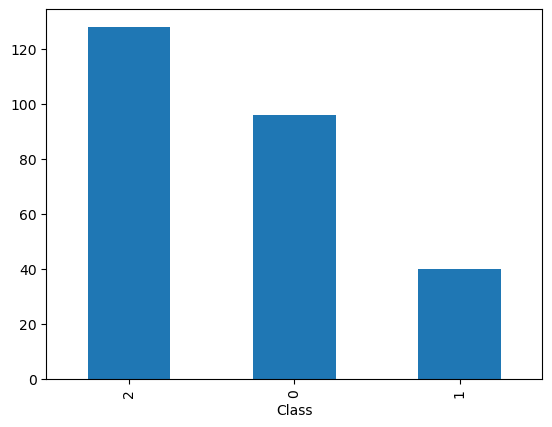

In [10]:
print(Y['Class'].value_counts())
Y['Class'].value_counts().plot(kind='bar')

In [11]:
import os
os.chdir(r"C:\Machine Learning1418\repository\KMeans Clustering")
from data_clean_preprocess import clean_process_CON_data
con_pipe,X_pre = clean_process_CON_data(X)
X_pre.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-1.095445,0.047217,-0.243168,-0.401231,-0.772794,-0.306535,-0.990860,2.676598,-1.132823,-0.316475,-0.516691
1,0.912871,-2.327116,-0.293227,-0.239960,-0.772794,-0.695151,-0.595116,-0.182261,-0.431615,-0.284154,-0.713387
2,0.912871,-1.634602,0.357546,-0.401231,-0.772794,0.237527,-0.911711,-0.841997,-0.531788,-0.348796,-1.106778
3,-1.095445,-0.447436,-0.843881,-0.622980,-1.127156,-1.316936,-0.911711,-0.402173,-1.032651,-0.348796,-1.106778
4,-1.095445,0.047217,-0.918970,-0.360914,-1.127156,-0.772874,-0.674265,-0.622085,-0.431615,-0.284154,-0.516691


In [12]:
os.chdir(r"C:\Deployment-Project-Diabetes-Prediction-Model\repository")

In [13]:
# saving the preprocessor in pickle format
import pickle
with open('pre.pkl','wb') as file1:
    pickle.dump(con_pipe,file1)

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)
xtrain.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
228,-1.095445,0.640800,0.707962,0.062424,-0.457806,0.159803,-0.357669,0.257564,0.269593,-0.251833,1.646961
92,0.912871,1.036522,0.457665,-0.159324,-2.347734,-0.928320,2.491691,-0.182261,1.070974,-0.219512,-0.516691
162,-1.095445,1.827967,-0.368316,-0.451629,1.983350,-0.461982,-0.832562,2.456686,-1.433341,-0.316475,0.663483
255,0.912871,0.344008,2.309865,2.431098,1.628989,1.014758,5.182754,-0.402173,0.469939,0.620829,1.253570
117,-1.095445,-1.634602,-0.743762,-0.391152,-0.339686,-0.306535,-0.595116,0.257564,0.069248,-0.251833,-0.516691


## Build and save the model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
model1 = LogisticRegression(class_weight='balanced')
model1.fit(xtrain, ytrain)

c:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [16]:
model2 = RandomForestClassifier(
    n_estimators=5,
    max_depth=4,
    min_samples_leaf=3,
    min_samples_split=5,
    class_weight='balanced'
)
model2.fit(xtrain,ytrain)

c:\Users\Akshay\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=5)

In [17]:
s1 = model1.score(xtrain,ytrain)
s2 = model2.score(xtrain,ytrain)
s3 = model1.score(xtest,ytest)
s4 = model2.score(xtest,ytest)

print('====Training scores====')
print(f'Random Forest Score: {s1}\t\t Logistic Regression Score:{s2}')
print('====Testing scores====')
print(f'Random Forest Score: {s3}\t\t Logistic Regression Score:{s4}')

====Training scores====
Random Forest Score: 0.9147727272727273		 Logistic Regression Score:0.9772727272727273
====Testing scores====
Random Forest Score: 0.875		 Logistic Regression Score:0.9318181818181818


In [18]:
params = {
    'max_depth':[2,3,4,5,6,7,8,9],
    'min_samples_split':[2,3,4,5,6,7]
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV
base_model = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=base_model,param_distributions=params,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain['Class'])

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6,
                                                              7]},
                   scoring='f1_macro')

In [20]:
rscv.best_params_

{'min_samples_split': 2, 'max_depth': 6}

In [21]:
rscv.best_score_

np.float64(0.969733956313681)

In [22]:
best_rfc = rscv.best_estimator_


In [23]:
best_rfc.score(xtrain,ytrain)

1.0

In [24]:
best_rfc.score(xtest,ytest)


0.9659090909090909

In [25]:
# save the model into pickle format: for resuability of finalised models=> deploy
with open('model.pkl','wb') as file:
    pickle.dump(best_rfc,file)
